# Sopstvena lica

U ovoj sveci bavićemo se problemom prepoznavanja osoba na zadatim slikama.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import decomposition
from sklearn import model_selection

Koristićemo skup slika `Labeled Faces in the Wild` koji sadrži slike lica poznatih ličnosti. Podaci se mogu učitati pozivom funkcije `fetch_lfw_people()` paketa `sklearn.datasets`. Prilikom poziva ove funkcije iskoristićemo parametar `resize` koji određuje skaliranje slika i parametar `min_faces_per_person` koji određuje koliko najmanje slika po osobi treba da ima u učitanom skupu. 

In [3]:
data = datasets.fetch_lfw_people(resize=0.8, min_faces_per_person=40)

Više o samom skupu se može pročitati u opisu:

In [4]:
# print(data.DESCR)

Učitane slike su dostupne preko svojstva `images`.

In [5]:
data.images.shape

(1777, 100, 75)

Možemo primetiti da radimo sa skupom od 1777 slika čije su dimenzije 100x75. Posebno ćemo sačuvati informacije o broju slika i dimenziji slika.

In [6]:
number_of_images = data.images.shape[0]

In [7]:
number_of_images

1777

In [8]:
image_shape = data.images[0].shape

In [9]:
image_shape

(100, 75)

Možemo prikazati i proizvolju sliku iz skupa.

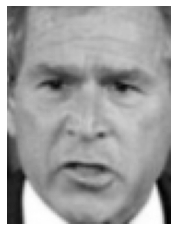

In [10]:
random_index = np.random.choice(np.arange(0, number_of_images), 1)[0]
plt.imshow(data.images[random_index], cmap='gray')
plt.axis('off')
plt.show()

Imena osoba čije se slike nalaze u skupu se mogu dobiti svojstvom `target_names` učitanog skupa. Ima ih ukupno 17.

In [11]:
data.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Gloria Macapagal Arroyo', 'Hugo Chavez',
       'Jacques Chirac', 'Jean Chretien', 'Jennifer Capriati',
       'John Ashcroft', 'Junichiro Koizumi', 'Laura Bush',
       'Lleyton Hewitt', 'Serena Williams', 'Tony Blair',
       'Vladimir Putin'], dtype='<U23')

In [12]:
number_of_persons = len(data.target_names)

In [13]:
number_of_persons

17

Pojedinačna obeležja slika su sadržana na nivou svojstva `target` i predstavljaju redne brojeve od 0 do 16 koji se mogu upariti sa prethodnim imenima.

Broj slika po osobi nije ravnopravan.

In [14]:
number_of_images_per_person = np.bincount(data.target)

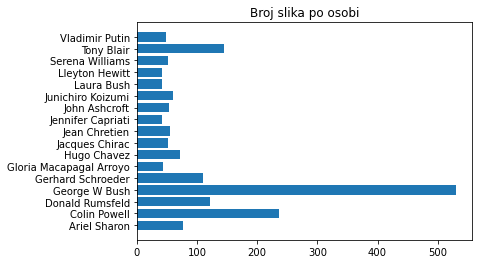

In [15]:
plt.barh(np.arange(0, number_of_persons), number_of_images_per_person)
plt.title('Broj slika po osobi')
plt.yticks(ticks=np.arange(0, number_of_persons),labels=data.target_names)
plt.show()

Prikaz proizvoljne slike možemo upariti sa odgovarajućim obeležjem.

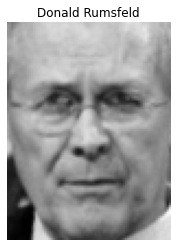

In [16]:
random_index = np.random.choice(np.arange(0, number_of_images), 1)[0]
plt.imshow(data.images[random_index], cmap='gray')
plt.title(data.target_names[data.target[random_index]])
plt.axis('off')
plt.show()

Rešavanju problema prepoznavanja osoba na slikama možemo pristupiti kao klasifikacionom zadatku uz adekvatno prikazivanje slika skupom odgovarajućih atributa. Koristićemo algoritam klasifikacije koji se zove $k$ najbližih suseda.

Algoritam $k$ najbližih suseda ćemo najlakše predstaviti preko primera sa donje slike. Zadatak je klasifikovati zeleni objekat u jednu od dve klase; treba odrediti da li krug pripada plavim kvadratima ili crvenim trouglovima. Ako je $k = 3$ (manji krug nacrtan punom linijom), zeleni krug će pripadati drugoj klasi zato što se unutar nacrtanog kruga nalaze dva trougla i samo jedan kvadrat. Ako je $k = 5$ (veći krug nacrtan isprekidanom linijom), zeleni krug će pripadati prvoj klasi budući da se unutar isprekidanog kruga nalazi više kvadrata nego trouglova.

<img src="assets/knn.png">

Koliko će se suseda posmatrati (vrednost parametra $k$) i kako će se oni određivati (izbor metrike) se kontroliše preko parametara samog klasifikatora. Obeležje novoj instanci će se uvek pridruživati na osnovu obeležja najbrojnije klase u susedstvu.

Pre nego li pristupimo zadatku klasifikacije, podatke ćemo podeliti na skup za treniranje i skup za testiranje gde će oko trećina podataka biti iskorišćena za testiranje.

Primetićemo da pored svojstva `images` učitani skup sadrži i svojstvo `data` kojim je moguće pristupiti slikama čiji su pikseli "ispravljeni" tj. svedeni na jednodimenzioni niz. Ovakav zapis je podesniji za korišćenje algoritma $k$ najbližih suseda.

In [17]:
data.data.shape

(1777, 7500)

In [18]:
data.images.shape

(1777, 100, 75)

Prilikom podele skupa na skup za treniranje i skup za testiranje, vodićemo računa i o stratifikaciji. 

In [19]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y, random_state=7)

In [20]:
X_train.shape

(1190, 7500)

In [21]:
X_test.shape

(587, 7500)

Dalje ćemo primeniti algoritam $k$ najbližig suseda i izračunati tačnost. Podrška za rad sa algoritmom najbližih suseda je stavljena na raspolaganje preko `KNeighborsClassifier` klase paketa `sklearn.neighbors`. Broj suseda `n_neighbors` ćemo podesiti na 5, a funkciju rastojanja na euklidsku.

In [22]:
from sklearn import neighbors

In [23]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [24]:
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [25]:
print('Tacnost modela je: ', score)

Tacnost modela je:  0.4616695059625213


Sada ćemo primeniti isti algoritam, ali ćemo smanjiti dimenzionalnost prostora koristeći PCA tehniku. Broj glavnih komponenti ćemo postaviti na 100.

In [26]:
pca = decomposition.PCA(n_components=100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
X_train_pca.shape

(1190, 100)

In [28]:
X_test_pca.shape

(587, 100)

Zatim ćemo ponoviti zadatak klasifikacije nad ovako dobijenim skupovima redukovane dimenzije.

In [29]:
classifier_pca = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_pca.fit(X_train_pca, y_train)
score_pca = classifier_pca.score(X_test_pca, y_test)

In [30]:
print('Tacnost modela koji koristi PCA je: ', score_pca)

Tacnost modela koji koristi PCA je:  0.47189097103918226


Uočimo da je skor nešto veći u slučaju kada koristimo PCA, ali da su dimenzije matrica sa kojima radimo značajno manje - imaju 750 puta manje atributa!

U nastavku će biti prikazano kako izgleda prvih nekoliko glavnih komponenti PCA tehnike. Prikazaćemo 20 glavnih komponenti u vidu bloka dimenzija 4x5.

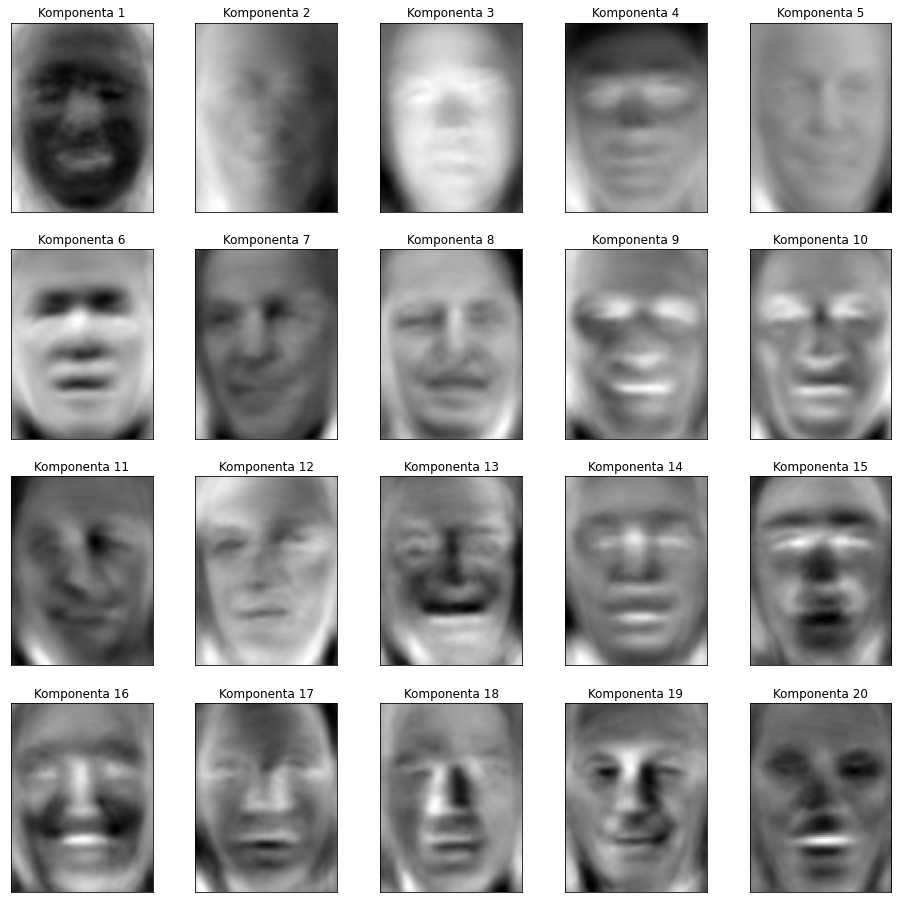

In [31]:
# svakom od 20 grafika/slika cemo skloniti oznake za x-osu i y-osu
figure, axis = plt.subplots(4, 5, figsize=(16, 16), subplot_kw={'xticks':(), 'yticks':()})

# kroz ovaj skup blokva cemo prolaziti iterativno 
# svescemo ga na jednodimenzioni niz pozivom funkcije ravel() 
ravel = axis.ravel()

# za svaki blok
for i in range(ravel.shape[0]):
    
    # izdvajamo osu za rad
    axis = ravel[i]
    
    # izdvajamo i-tu komponentu i svodimo je na dimenzije slike
    component = pca.components_[i]
    component = component.reshape(image_shape)
    
    # prikazujemo sliku i naziv komponente
    axis.imshow(component, cmap='gray')
    axis.set_title('Komponenta {0}'.format(i+1))

Vidimo da se različite komponente fokusiraju na različite karakteristike lica kao što su oblik lica, položaj glave, predeo očiju i nosa, i slično. Ovo svakako može biti informativno u interpretaciji i analizi rada modela.

Dalje možemo videti kako se predstavlja npr. neka od slika skupa za testiranje koristeći izdvojene komponente.

Prvo ćemo prikazati originalnu sliku.

In [32]:
demo_image = X_test[0]

In [33]:
demo_image.shape

(7500,)

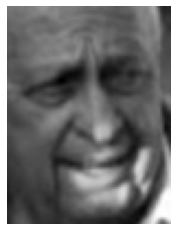

In [34]:
plt.imshow(demo_image.reshape(image_shape), cmap='gray')
plt.axis('off')
plt.show()

Zatim ćemo prikazati sliku koja se dobija PCA transformacijom.

In [35]:
demo_image_pca = X_test_pca[0]

In [36]:
demo_image_pca.shape

(100,)

Atributi gornje slike odgovaraju skalarima/koeficijentima koji množe izdvojene glavne komponente.

In [37]:
pca.n_components

100

Zato ćemo formirati sliku koja predstavlja zbir svih komponenti koje su pomnožene izdvojenim koeficijentima. 

In [38]:
temp_img = np.zeros(image_shape[0]*image_shape[1])

In [39]:
temp_img.shape

(7500,)

In [40]:
for i in range(0, pca.n_components):
    temp_img += demo_image_pca[i]*pca.components_[i]

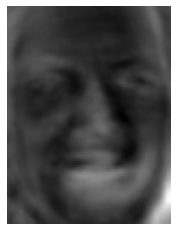

In [41]:
plt.imshow(temp_img.reshape(image_shape), cmap='gray')
plt.axis('off')
plt.show()

Primećujemo da se dobijene slike "liče". Povećavanjem broj komponenti npr. korišćenjem 400 kopomenti, ove dve slike će biti sličnije.